<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#modelling" data-toc-modified-id="modelling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>modelling</a></span></li><li><span><a href="#Model-parameters" data-toc-modified-id="Model-parameters-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model parameters</a></span></li><li><span><a href="#Model-score-(coefficient-of-determination-R^2)-for-training" data-toc-modified-id="Model-score-(coefficient-of-determination-R^2)-for-training-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model score (coefficient of determination R^2) for training</a></span></li><li><span><a href="#Model-predictions" data-toc-modified-id="Model-predictions-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Model predictions</a></span></li><li><span><a href="#Residual-Plots" data-toc-modified-id="Residual-Plots-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Residual Plots</a></span></li><li><span><a href="#Best-fit-line-with-confidence-interval" data-toc-modified-id="Best-fit-line-with-confidence-interval-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Best fit line with confidence interval</a></span></li><li><span><a href="#Seaborn-regplot" data-toc-modified-id="Seaborn-regplot-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Seaborn regplot</a></span></li></ul></li><li><span><a href="#Assumptions-of-Linear-Regression" data-toc-modified-id="Assumptions-of-Linear-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Assumptions of Linear Regression</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.
![](../data/raw/data_description.png)

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# my custom module
import bhishan
import src
from bhishan.util_statsmodels import print_statsmodels_summary

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 100)
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image

print([(x.__name__, x.__version__) for x in [pd,np,sns,matplotlib]])

[('pandas', '0.25.0'), ('numpy', '1.16.4'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [4]:
import scipy

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [8]:
def show_method_attributes(method, ncols=2):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [I for I in dir(method) if I[0].islower()]
    x = [I for I in x if I not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

# Load the data

In [9]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Train test split

In [10]:
train, test = train_test_split(df, test_size=0.2,random_state=100)

print(df.shape, train.shape)
train.head(2)

(21613, 21) (17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16000,2561340020,20140804T000000,325000.0,3,1.75,1780,11096,1.0,0,0,3,7,1210,570,1979,0,98074,47.6170,-122.051,1780,10640
11286,8598200070,20141208T000000,278000.0,2,2.50,1420,2229,2.0,0,0,3,7,1420,0,2004,0,98059,47.4871,-122.165,1500,2230


# Simple Linear Regression

## modelling

In [11]:
# using sm
features = ['sqft_living']
target = ['price']

Xtrain = train[features]
ytrain = train[target]

Xtest = test[features]
ytest = test[target]

X1train = sm.add_constant(Xtrain.values)
mod = sm.OLS(ytrain, X1train )
res = mod.fit()

summary = res.summary()
print_statsmodels_summary(summary)

In [12]:
# using smf
formula = 'price ~ sqft_living'
mod = smf.ols(formula=formula, data= pd.concat([Xtrain,ytrain],axis=1))
res = mod.fit()

summary = res.summary()

In [13]:
show_method_attributes(res,7)

,0,1,2,3,4,5,6
0,aic,conf_int_el,df_resid,get_influence,mse_resid,resid,t_test
1,bic,cov_HC0,diagn,get_prediction,mse_total,resid_pearson,t_test_pairwise
2,bse,cov_HC1,eigenvals,get_robustcov_results,nobs,rsquared,tvalues
3,centered_tss,cov_HC2,el_test,initialize,normalized_cov_params,rsquared_adj,uncentered_tss
4,compare_f_test,cov_HC3,ess,k_constant,outlier_test,save,use_t
5,compare_lm_test,cov_kwds,f_pvalue,llf,params,scale,wald_test
6,compare_lr_test,cov_params,f_test,load,predict,ssr,wald_test_terms
7,condition_number,cov_type,fittedvalues,model,pvalues,summary,wresid
8,conf_int,df_model,fvalue,mse_model,remove_data,summary2,


## Model parameters

In [14]:
res.params

Intercept     -42628.976515
sqft_living      280.685417
dtype: float64

In [15]:
text = " y = {:.2f} x + ({:.2f})".format(*res.params.values[::-1])
text

' y = 280.69 x + (-42628.98)'

## Model score (coefficient of determination R^2) for training

In [16]:
res.rsquared, res.rsquared_adj

(0.4871565982411399, 0.48712693353719727)

## Model predictions

In [17]:
ypred = res.predict(Xtest)
ypred.shape, ytest.shape

((4323,), (4323, 1))

In [18]:
ypred.head()

19836    641401.384197
10442    395240.273674
20548    628209.169608
11014    372785.440331
4138     485059.607046
dtype: float64

In [19]:
ytest.head()

,price
19836,285000.0
10442,239950.0
20548,460000.0
11014,397500.0
4138,545000.0


In [20]:
pd.concat([ytest,ypred.rename('ypred')],axis=1).head()

,price,ypred
19836,285000.0,641401.384197
10442,239950.0,395240.273674
20548,460000.0,628209.169608
11014,397500.0,372785.440331
4138,545000.0,485059.607046


## Residual Plots

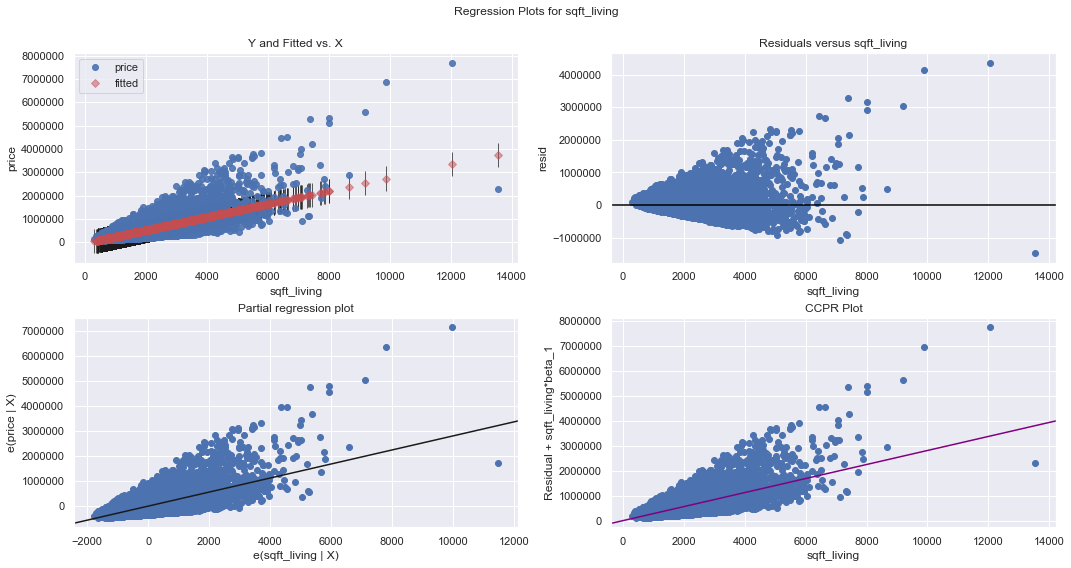

In [21]:
feature = 'sqft_living'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(res, feature, fig=fig)

## Best fit line with confidence interval

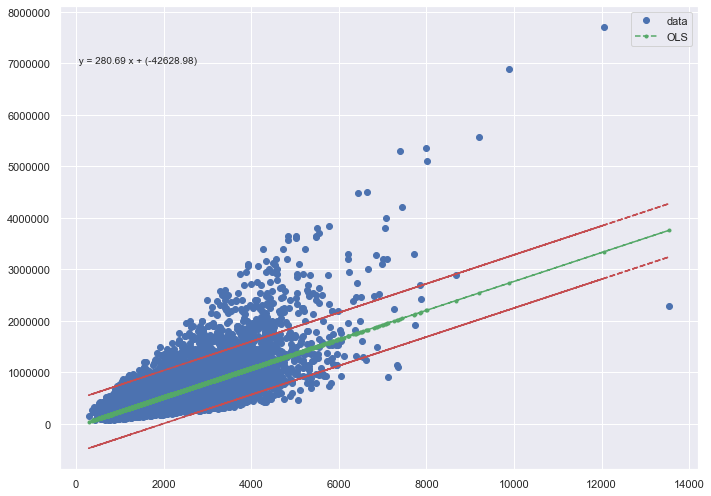

In [22]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# data
x = Xtrain[['sqft_living']].values.reshape(-1,1)
y = ytrain.values.reshape(-1,1)
best_fit = res.fittedvalues.values.reshape(-1,1)


# figure
fig, ax = plt.subplots(figsize=(10,7))

# text
text = " y = {:.2f} x + ({:.2f})".format(*res.params.values[::-1])
ax.text(0,7000_000, text)


ax.plot(x, y, 'o', label="data")
ax.plot(x, best_fit, 'g--.', label="OLS")

# confidence intervals
_, ci_low, ci_high = wls_prediction_std(res)
ax.plot(x, ci_high, 'r--')
ax.plot(x, ci_low, 'r--')

# plot legend
ax.legend(loc='best')
plt.tight_layout()

## Seaborn regplot

In [23]:
Xtrain.shape, ytrain.shape

((17290, 1), (17290, 1))

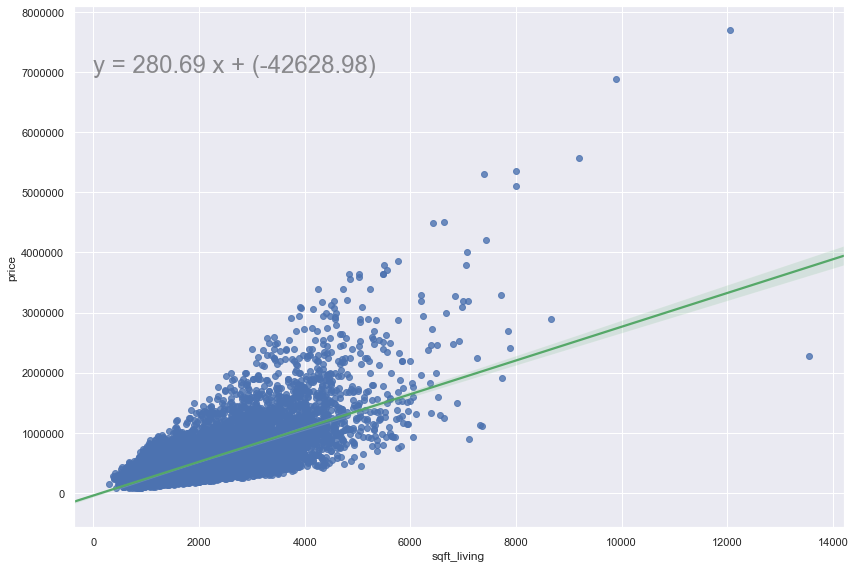

In [24]:
plt.figure(figsize=(12,8))
p = sns.regplot(x='sqft_living', y='price', data = pd.concat([Xtrain,ytrain],axis=1), line_kws={'color': 'g'})
slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                       y=p.get_lines()[0].get_ydata())

text = 'y = {:.2f} x + ({:.2f})'.format(slope, intercept)

plt.text(0,7000_000, text,size=24,alpha=0.5)
plt.tight_layout()
plt.show()

# Assumptions of Linear Regression

ValueError: fname must be a PathLike or file handle

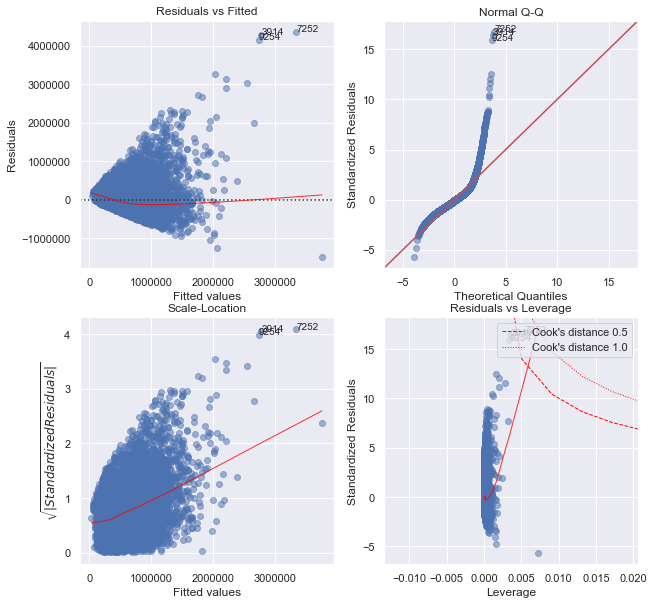

In [25]:
from bhishan.util_statsmodels import regression_residual_plots

formula = 'price ~ sqft_living'
mod = smf.ols(formula=formula, data=df)
res = mod.fit()

regression_residual_plots(res, dependent_var="price",data=df[['sqft_living','price']])

In [ ]:
train.head()

In [ ]:
model_fit = res

model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# Annotations of Outliers
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for i in abs_norm_resid_top_3:
    print(i)

In [ ]:
from bhishan.util_statsmodels import regression_residual_plots

formula = 'price ~ sqft_living'
mod = smf.ols(formula=formula, data=train)
res = mod.fit()

regression_residual_plots(res, dependent_var="price",data=train[['sqft_living','price']],annotate_outliers=False)

In [ ]:
# lets try log transformation and plot again
train['log_sqft_living'] = np.log(train['sqft_living'].values)

features = ['log_sqft_living']
target = ['price']
X = train[features]
y = train[target]

X1 = sm.add_constant(X.values)
mod = sm.OLS(y, X1 )
res = mod.fit()

from bhishan.util_statsmodels import regression_residual_plots
regression_residual_plots(res, dependent_var="price",
                          data=train[['log_sqft_living','price']],
                          verbose=False,
                         annotate_outliers=False,
                         ofile='../reports/figures/regression_residual_plots.png')


In [ ]:
# linearity does not hold much
# normality does not hold much
# heteroskedasticity is little bit improved
# there are no outlier leverage points

# we may need to include more than one features to estimate price
# rather than only log of living area.

# Multiple Linear Regression

In [ ]:
df.head(2)

In [ ]:
df.columns

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

target = ['price']
Xtrain = train[features]
ytrain = train[target]
Xtest = test[features]
ytest = test[target]

X1train = sm.add_constant(Xtrain.values)
mod = sm.OLS(ytrain, X1train )
res = mod.fit()

print_statsmodels_summary(res.summary())

In [ ]:
res.rsquared, res.rsquared_adj